# Matplotlib bar chart storytelling

In [2]:
import pandas as pd
import duckdb

from constants import GRAY_1, GRAY_2,GRAY_3,BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")


In [3]:
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [5]:
df_quantity_brand = duckdb.query(
    """---sql
    SELECT 
        make AS Brand,
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY Brand
    ORDER BY quantity DESC
    
    """
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Secma,1.0
Martin Motors,1.0
Infiniti,1.0


# Bar charts

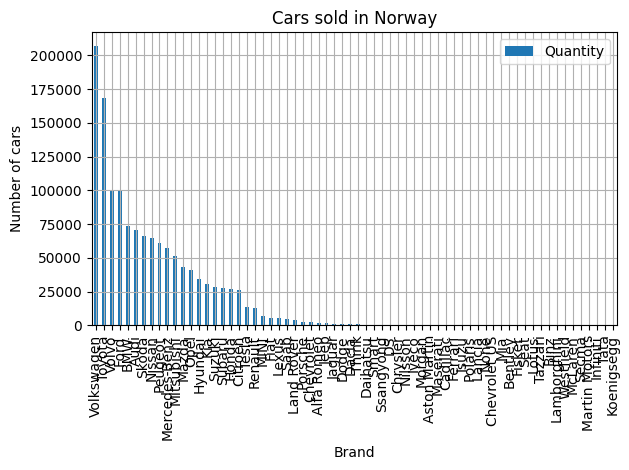

In [10]:
ax = df_quantity_brand.plot(kind="bar", title="Cars sold in Norway", ylabel="Number of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_initial.png")

In [16]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


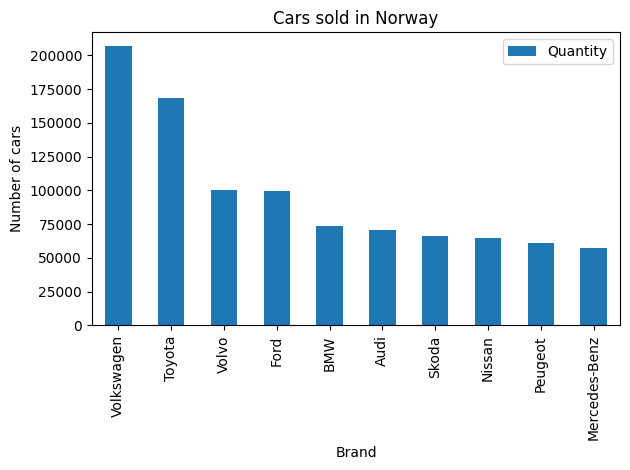

In [17]:
ax = df_quantity_brand.iloc[:10].plot(
    kind="bar", title="Cars sold in Norway", ylabel="Number of cars"
    )

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_initial.png")

## apply data storytelling

- remove clutter
- contrast
- colors sparingly
- descriptive title and labels
- positioning title and labels
- proximity principle with annotations
- percentage instead of absolute values'
- horizontal bar


In [24]:
# percentage 
df_percentage = df_quantity_brand["Quantity"]/ df_quantity_brand["Quantity"].sum() * 100
df_percentage.sum()

np.float64(100.00000000000001)

In [62]:
df_percentage_top10 = df_percentage.iloc[:10]
colors = [GRAY_1] * len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

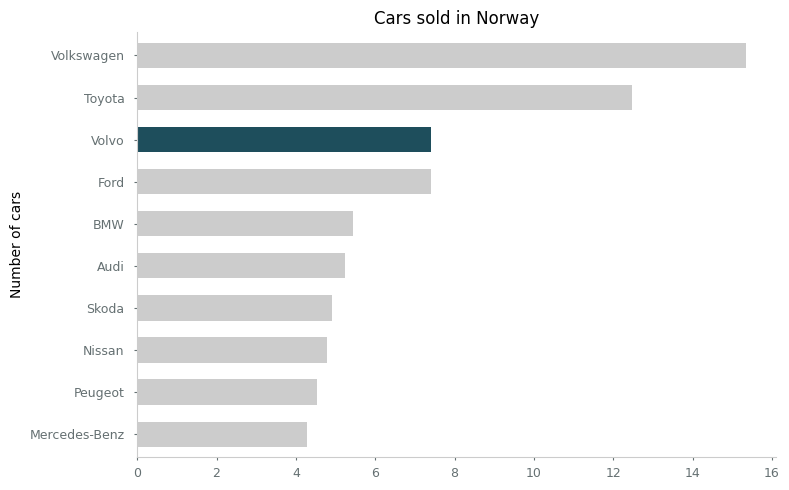

In [63]:
# horizontal bar chart
ax = df_percentage.iloc[:10].plot(
    kind="barh", 
    title="Cars sold in Norway", 
    ylabel="Number of cars", 
    figsize = (8,5), 
    width = 0.6,
    color = colors
    )

ax.invert_yaxis()

# remove clutter
ax.spines[['top', 'right']].set_visible(False)

# contrast
ax.spines[['bottom', 'left']].set_color(GRAY_1)
ax.tick_params(
    axis="both", 
    colors = GRAY_2, 
    labelsize = 9, 
    length = 2,
    pad = 5
    )
ax.tick_params(axis= "y", pad = 7)



fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_bar_storytelling.png")

In [43]:
help(ax.spines)

Help on Spines in module matplotlib.spines object:

class Spines(collections.abc.MutableMapping)
 |  Spines(**kwargs)
 |
 |  The container of all `.Spine`\s in an Axes.
 |
 |  The interface is dict-like mapping names (e.g. 'left') to `.Spine` objects.
 |  Additionally, it implements some pandas.Series-like features like accessing
 |  elements by attribute::
 |
 |      spines['top'].set_visible(False)
 |      spines.top.set_visible(False)
 |
 |  Multiple spines can be addressed simultaneously by passing a list::
 |
 |      spines[['top', 'right']].set_visible(False)
 |
 |  Use an open slice to address all spines::
 |
 |      spines[:].set_visible(False)
 |
 |  The latter two indexing methods will return a `SpinesProxy` that broadcasts all
 |  ``set_*()`` and ``set()`` calls to its members, but cannot be used for any other
 |  operation.
 |
 |  Method resolution order:
 |      Spines
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection